In [591]:
#####################################################################################################
######################### UNIVERSITY DATA SET  ######################################################
#####################################################################################################


In [592]:
#################################################################
############ Part I - Importing
#################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [593]:
df = pd.read_csv('College_Data',index_col=0)

In [594]:
#####################################################################
########################### Part II - Duplicates
#####################################################################


In [595]:
df[df.duplicated()]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [596]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [597]:
####################################################################
############## Part III - Missing Values
####################################################################


In [598]:
from matplotlib.colors import LinearSegmentedColormap

Amelia = LinearSegmentedColormap.from_list('black_yellow', ['black', 'yellow'])


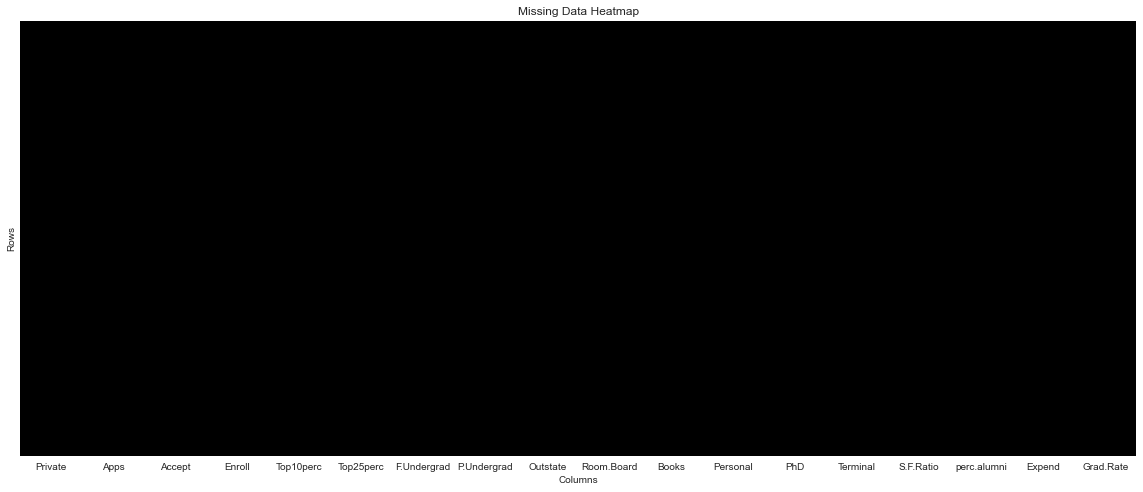

In [599]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')

#### why Amelia, if you coming from R then you might have used Amelia package which detects the missing value 
#### On July 2, 1937, Amelia disappeared over the Pacific Ocean while attempting to become the first female pilot to circumnavigate the world

In [600]:
df.isnull().any()                 #### no missing values found

Private        False
Apps           False
Accept         False
Enroll         False
Top10perc      False
Top25perc      False
F.Undergrad    False
P.Undergrad    False
Outstate       False
Room.Board     False
Books          False
Personal       False
PhD            False
Terminal       False
S.F.Ratio      False
perc.alumni    False
Expend         False
Grad.Rate      False
dtype: bool

In [601]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [602]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [603]:
######################################################################
############## Part IV - EDA
######################################################################


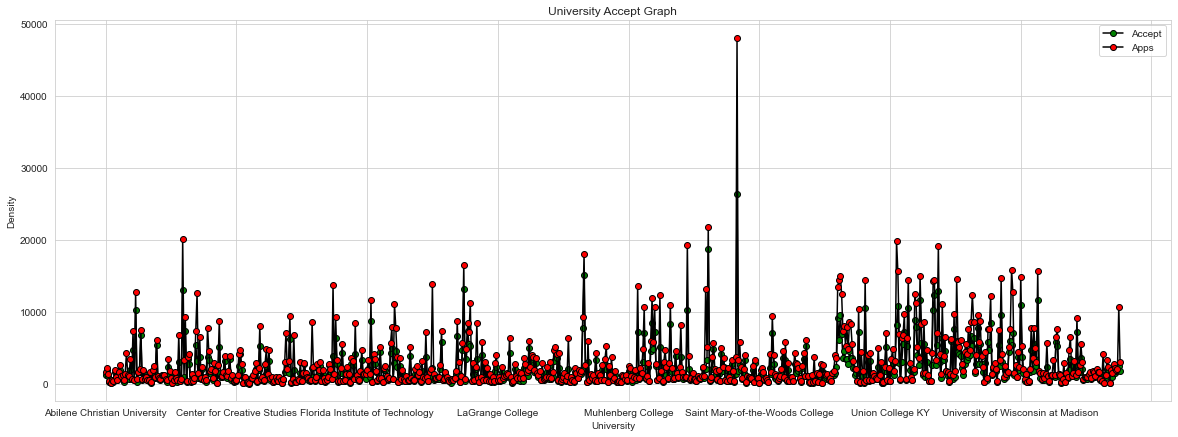

In [604]:
df['Accept'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='green',color='black')
df['Apps'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

plt.title('University Accept Graph')

plt.xlabel('University')

plt.ylabel('Density')

#### seems like one university is getting a lot of application and hence the acceptence is higher as well

In [605]:
df[df.Accept == df.Accept.max()]                  #### its Rutgers, being from NJ its quite suprising to me honestly

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Rutgers at New Brunswick,No,48094,26330,4520,36,79,21401,3712,7410,4748,690,2009,90,95,19.5,19,10474,77


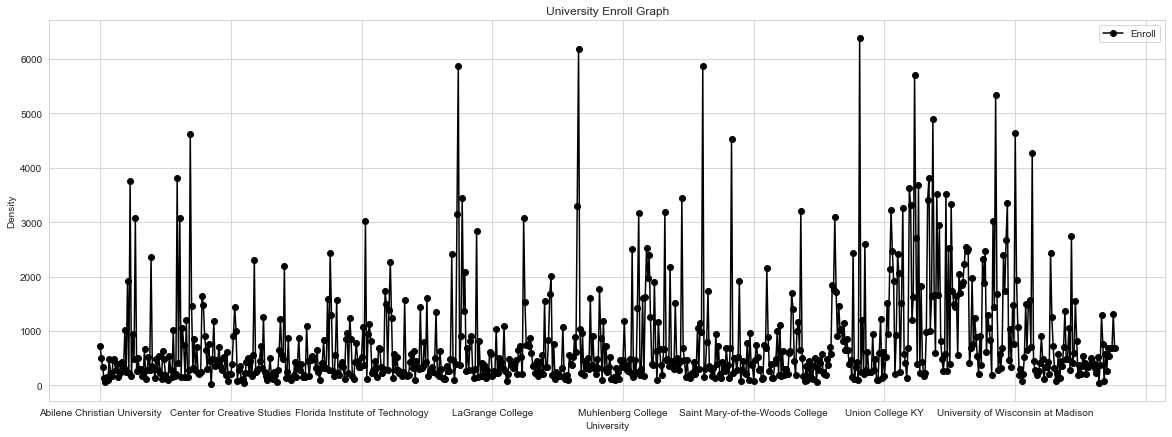

In [606]:
df['Enroll'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='black',color='black')

plt.title('University Enroll Graph')

plt.xlabel('University')

plt.ylabel('Density')

#### this is more realistic graph because it details the numbers of applicants enrolled

In [607]:
df[df.Enroll == df.Enroll.min()]                #### this is the least enrolled university/college in our data set.\
                                                #### also the application they getting is just 100 out of which they only reject 10
                                                #### its private so that should contribute more to its lesser enrollment
    

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Capitol College,Yes,100,90,35,10,52,282,331,8400,2812,300,2134,10,50,12.1,24,7976,52


In [608]:
df[df.Enroll == df.Enroll.max()]                    #### interesting but its not private so that should be the reason but still interesting


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Texas A&M Univ. at College Station,No,14474,10519,6392,49,85,31643,2798,5130,3412,600,2144,89,91,23.1,29,8471,69


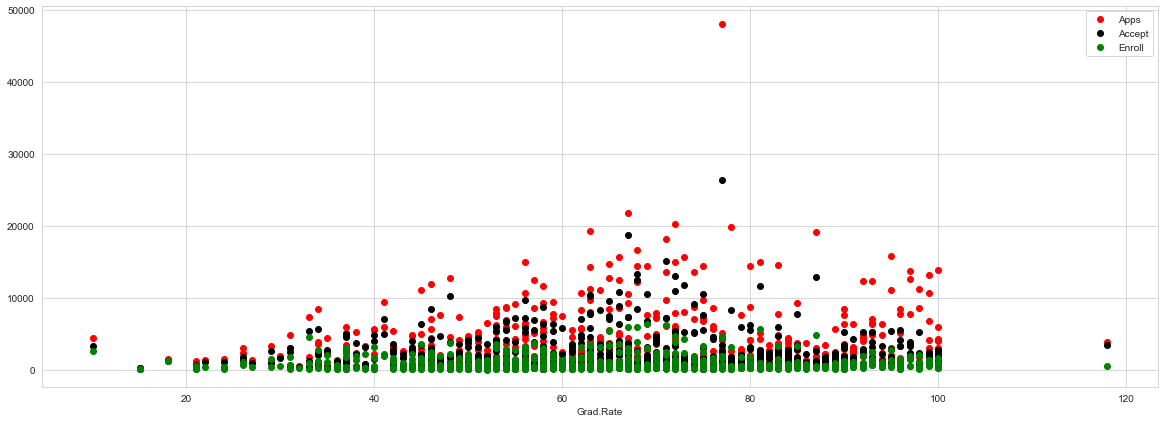

In [609]:
df.plot(x='Grad.Rate',y=['Apps','Accept','Enroll'],linestyle='',marker='o',figsize=(20,7),color={'Apps':'red',
                                                                                                 'Accept':'black',
                                                                                                 'Enroll':'green'})

#### so obviously the applications are massive but graduation rate is lower when the applicants are less which is not suprising
#### but there is some mistake in this data set, graduation rate can't exceed 100% so lets take that into account

In [610]:
df = df[df['Grad.Rate'] <= 100]

df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


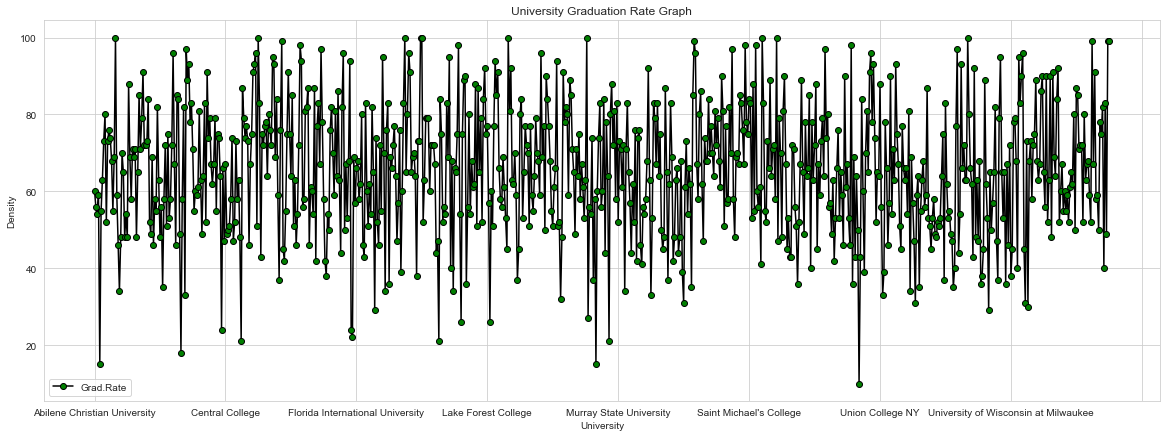

In [611]:
df['Grad.Rate'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='green',color='black')

plt.title('University Graduation Rate Graph')

plt.xlabel('University')

plt.ylabel('Density')

#### lets see who are below 20% grad rate

In [612]:
df[df['Grad.Rate'] < 20]          #### all private, interesting

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Brewton-Parker College,Yes,1436,1228,1202,10,26,1320,822,4371,2370,500,2000,62,62,12.6,10,4900,18
Montreat-Anderson College,Yes,263,223,103,10,24,316,20,8438,3372,500,2958,42,50,11.1,4,11989,15
Texas Southern University,No,4345,3245,2604,15,85,5584,3101,7860,3360,600,1700,65,75,18.2,21,3605,10


In [613]:
df['private_uni'] = df.Private.map({'Yes':'1',
                                    'No':0})

df.private_uni.unique()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['1', 0], dtype=object)

In [614]:
df.private_uni.value_counts()

1    564
0    212
Name: private_uni, dtype: int64

In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      776 non-null    object 
 1   Apps         776 non-null    int64  
 2   Accept       776 non-null    int64  
 3   Enroll       776 non-null    int64  
 4   Top10perc    776 non-null    int64  
 5   Top25perc    776 non-null    int64  
 6   F.Undergrad  776 non-null    int64  
 7   P.Undergrad  776 non-null    int64  
 8   Outstate     776 non-null    int64  
 9   Room.Board   776 non-null    int64  
 10  Books        776 non-null    int64  
 11  Personal     776 non-null    int64  
 12  PhD          776 non-null    int64  
 13  Terminal     776 non-null    int64  
 14  S.F.Ratio    776 non-null    float64
 15  perc.alumni  776 non-null    int64  
 16  Expend       776 non-null    int64  
 17  Grad.Rate    776 non-null    int64  
 18  pri

In [616]:
df['private_uni'] = df['private_uni'].astype(int)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


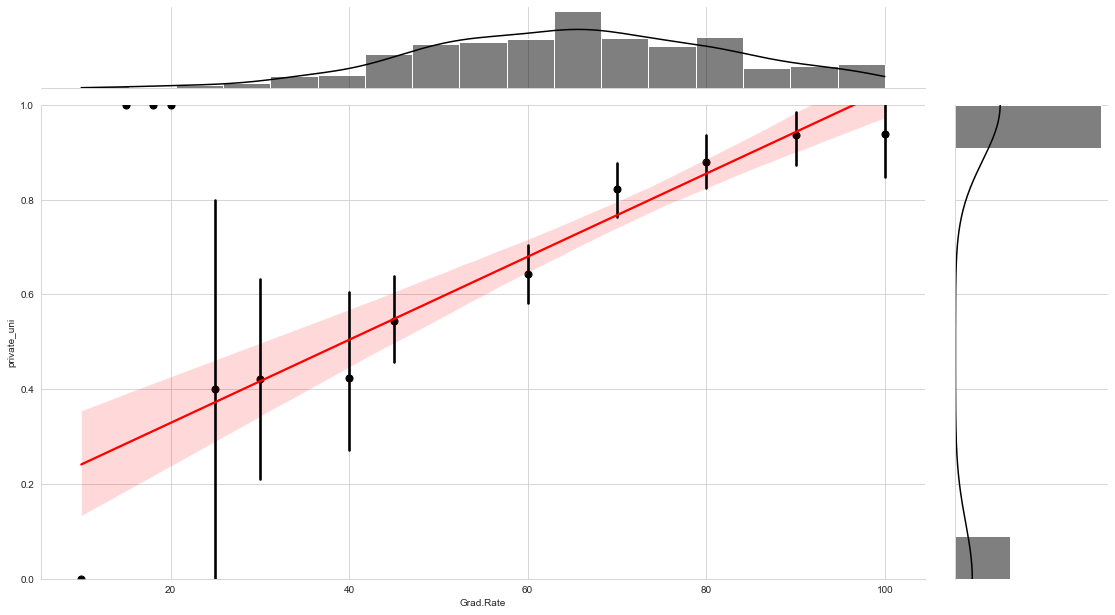

In [617]:
g = sns.jointplot(x='Grad.Rate',y='private_uni',data=df,kind='reg',x_bins=[1,5,10,15,18,20,25,30,40,45,60,70,80,90,100],color='black',joint_kws={'line_kws':{'color':'red'}})

g.fig.set_size_inches(17,9)

g.ax_joint.set_ylim(0,1)

#### clearly we see some correlation here, as the increment to Private university increases the graduation rate increases too

In [618]:
from scipy.stats import pearsonr


In [619]:
co_eff, p_value = pearsonr(df['Grad.Rate'],df.private_uni)

co_eff

0.33586021816896683

In [620]:
p_value                          #### definately correlated 

6.470131880361223e-22

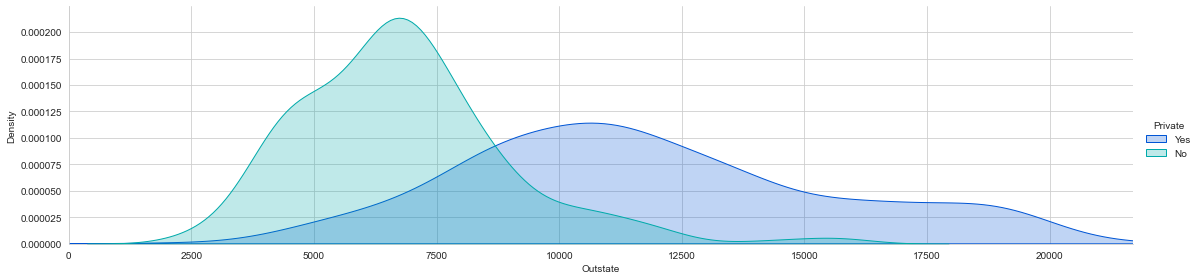

In [621]:
pl = sns.FacetGrid(df,hue='Private',aspect=4,height=4,palette='winter')

pl.map(sns.kdeplot,'Outstate',fill=True)

pl.set(xlim=(0,df.Outstate.max()))

pl.add_legend()

#### this is not suprising at all, if you are outstate student in a Private university, you end up paying susbtantially more then if you were outstate in a non private university


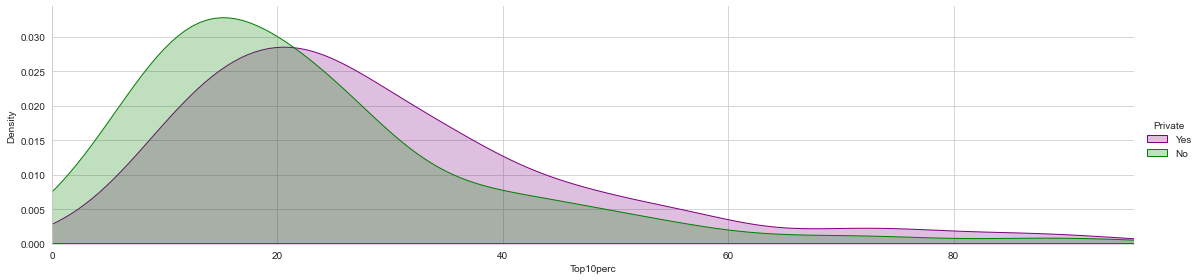

In [622]:
custom = {'Yes':'purple',
          'No':'green'}

pl = sns.FacetGrid(df,hue='Private',aspect=4,height=4,palette=custom)

pl.map(sns.kdeplot,'Top10perc',fill=True)

pl.set(xlim=(0,df.Top10perc.max()))

pl.add_legend()

#### interesting students who are top10 percent prefer private universities, in short students who are excellent in their academics prefer private universities compared to non privates


In [623]:
corr = df.corr()

corr

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,private_uni
Apps,1.000000,0.943520,0.846965,0.339383,0.352197,0.814834,0.398512,0.050237,0.164841,0.132484,0.179265,0.394039,0.371313,0.095621,-0.090169,0.259730,0.146786,-0.432385
Accept,0.943520,1.000000,0.912079,0.193410,0.248488,0.874998,0.441865,-0.025566,0.090602,0.113328,0.202158,0.360390,0.340395,0.176228,-0.159864,0.125035,0.065446,-0.475925
Enroll,0.846965,0.912079,1.000000,0.181062,0.226548,0.964682,0.513000,-0.155584,-0.040084,0.112831,0.280786,0.332466,0.308492,0.237302,-0.180886,0.064046,-0.021397,-0.567857
Top10perc,0.339383,0.193410,0.181062,1.000000,0.891841,0.140664,-0.106205,0.562401,0.372390,0.119367,-0.095164,0.531303,0.490031,-0.385078,0.455524,0.660935,0.502540,0.165121
Top25perc,0.352197,0.248488,0.226548,0.891841,1.000000,0.198874,-0.054377,0.489408,0.332364,0.116032,-0.082634,0.545442,0.523781,-0.294767,0.417875,0.527361,0.484702,0.096674
F.Undergrad,0.814834,0.874998,0.964682,0.140664,0.198874,1.000000,0.570342,-0.215982,-0.068598,0.115799,0.316689,0.318162,0.299443,0.279797,-0.229674,0.018388,-0.077066,-0.615393
P.Undergrad,0.398512,0.441865,0.513000,-0.106205,-0.054377,0.570342,1.000000,-0.253762,-0.061031,0.081440,0.319375,0.147847,0.140793,0.232615,-0.281015,-0.083861,-0.256418,-0.451849
Outstate,0.050237,-0.025566,-0.155584,0.562401,0.489408,-0.215982,-0.253762,1.000000,0.654516,0.038963,-0.299819,0.384342,0.408551,-0.554829,0.566230,0.672742,0.575838,0.553016
Room.Board,0.164841,0.090602,-0.040084,0.372390,0.332364,-0.068598,-0.061031,0.654516,1.000000,0.127813,-0.198946,0.333080,0.377050,-0.362704,0.272532,0.502061,0.425836,0.340309
Books,0.132484,0.113328,0.112831,0.119367,0.116032,0.115799,0.081440,0.038963,0.127813,1.000000,0.179976,0.028311,0.101162,-0.031952,-0.040124,0.112575,-0.000150,-0.018797


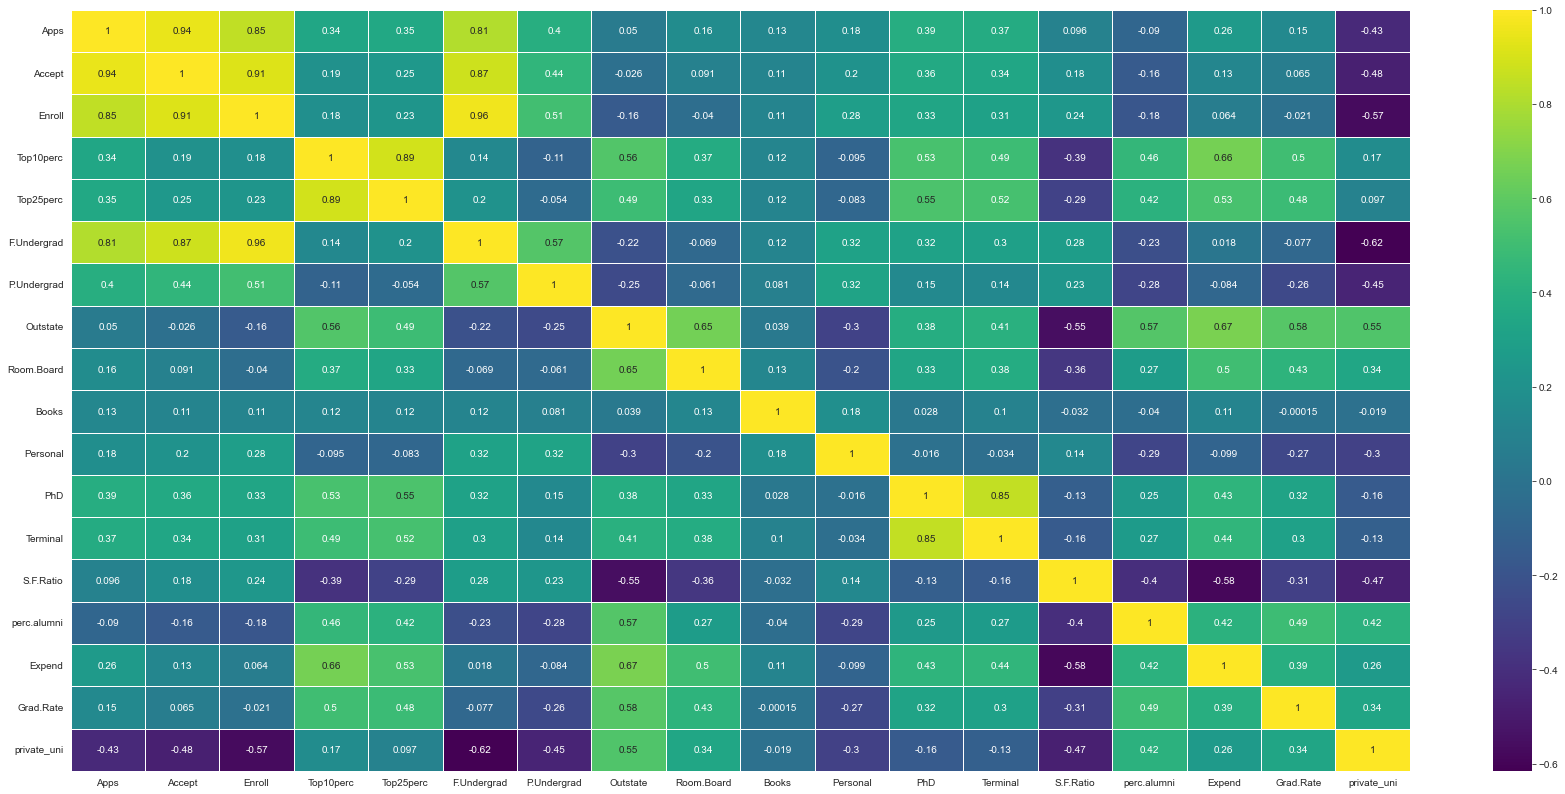

In [624]:
fig, ax = plt.subplots(figsize=(30,14))

sns.heatmap(corr,ax=ax,linewidths=0.5,annot=True,cmap='viridis')

#### the ones to watch are Outstate, top10perc, top25perc, roomboard, perc_alumni, expend, grad_rate

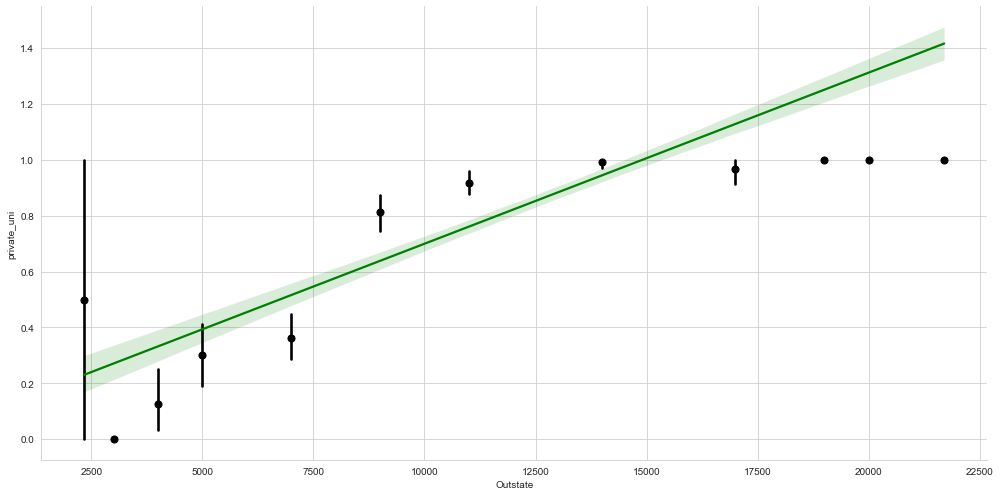

In [625]:
sns.lmplot(x='Outstate',y='private_uni',data=df,height=7,aspect=2,x_bins=[2340,3000,4000,5000,7000,9000,11000,14000,17000,19000,20000,21000,21700],line_kws={'color':'green'},scatter_kws={'color':'black'})

#### this is not suprising at all, the Outstate fees increases as the y-axis appraches private universities

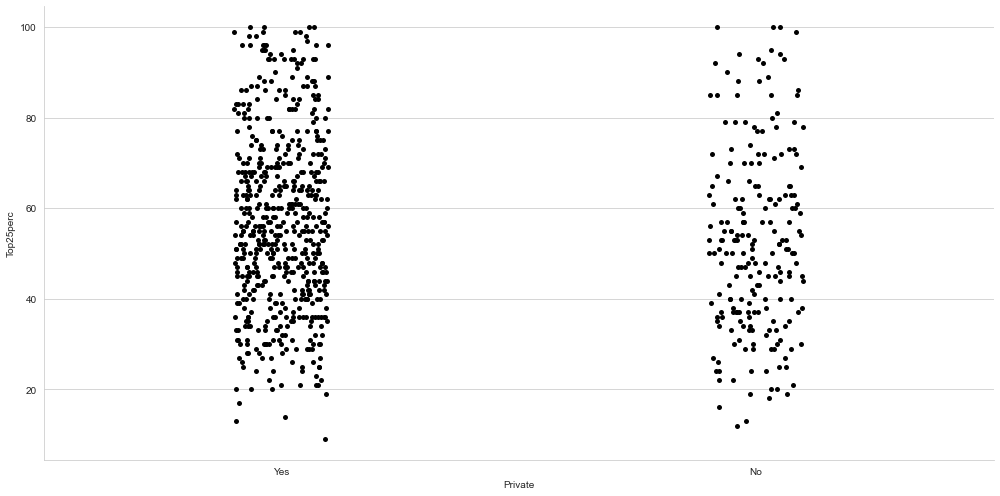

In [626]:
sns.catplot(x='Private',y='Top25perc',data=df,kind='strip',height=7,aspect=2,legend=True,jitter=True,color='black')

#### seems like best students prefer the private universities more compared to non private ones, very interesting


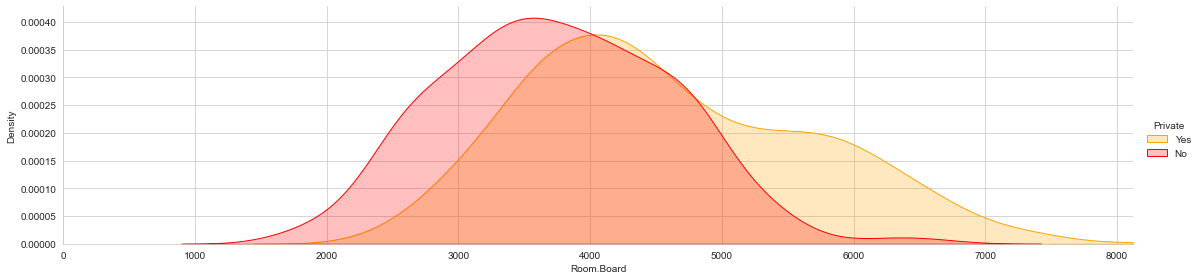

In [627]:
custom = {'Yes':'orange',
          'No':'red'}

pl = sns.FacetGrid(df,hue='Private',aspect=4,height=4,palette=custom)

pl.map(sns.kdeplot,'Room.Board',fill=True)

pl.set(xlim=(0,df['Room.Board'].max()))

pl.add_legend()

#### obviosuly if the university is private the fees for room boarding is 


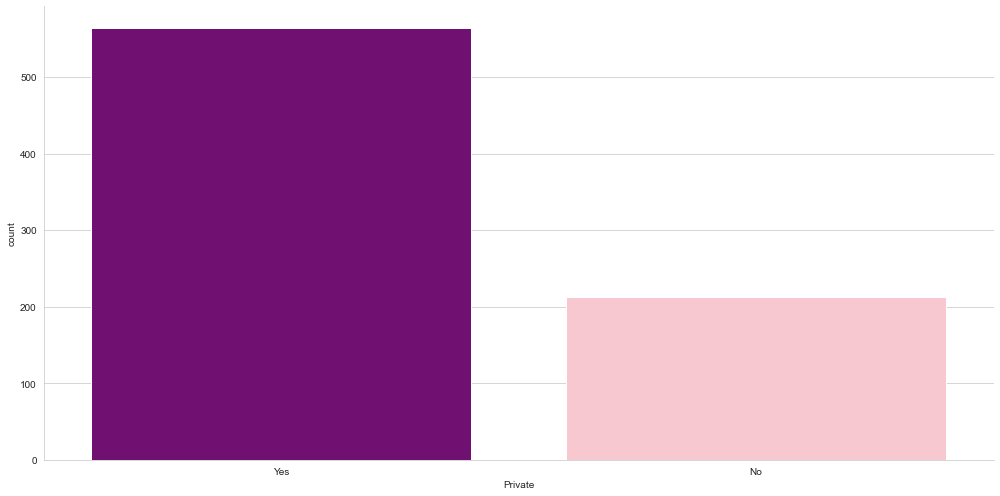

In [628]:
sns.catplot(x='Private',data=df,kind='count',height=7,aspect=2,palette={'Yes':'purple',
                                                                        'No':'pink'})

#### interestingly we have more students in private universities then in non privates


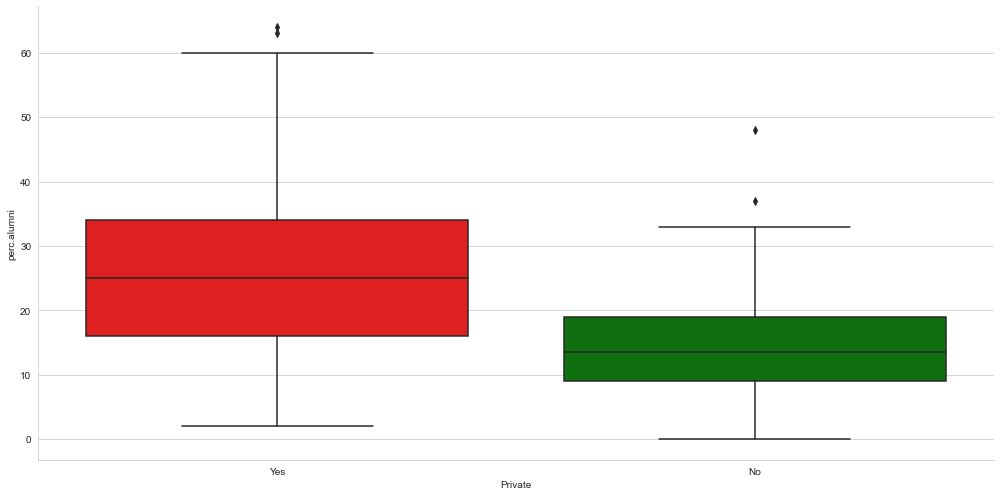

In [629]:
sns.catplot(x='Private',y='perc.alumni',data=df,kind='box',height=7,aspect=2,legend=True,palette={'Yes':'red',
                                                                                                  'No':'green'})

#### another interesting aspect for private universities is that alumni do contribute significantly more towards private universities

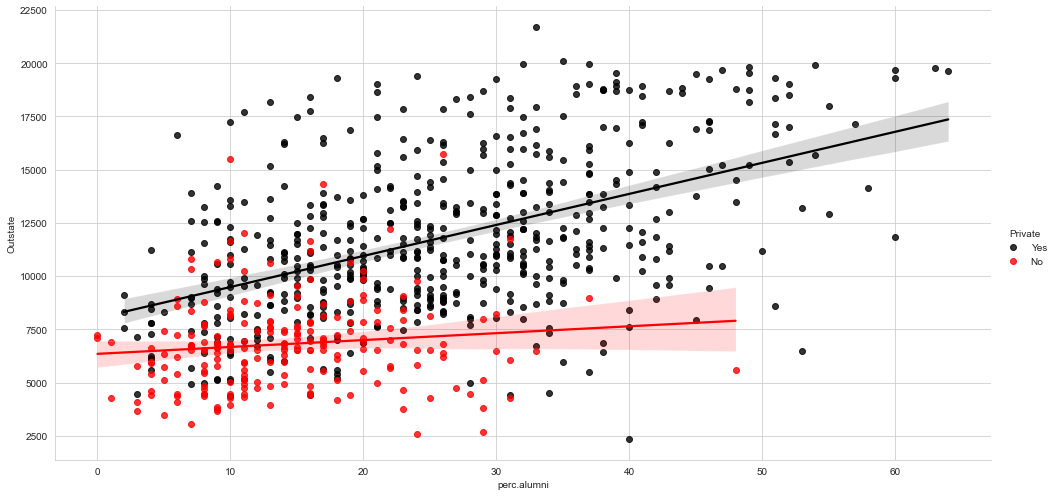

In [630]:
sns.lmplot(x='perc.alumni',y='Outstate',data=df,hue='Private',height=7,aspect=2,palette={'Yes':'black',
                                                                                         'No':'red'})

#### we see a clear correlation between Private uni to alumni donation and outstate

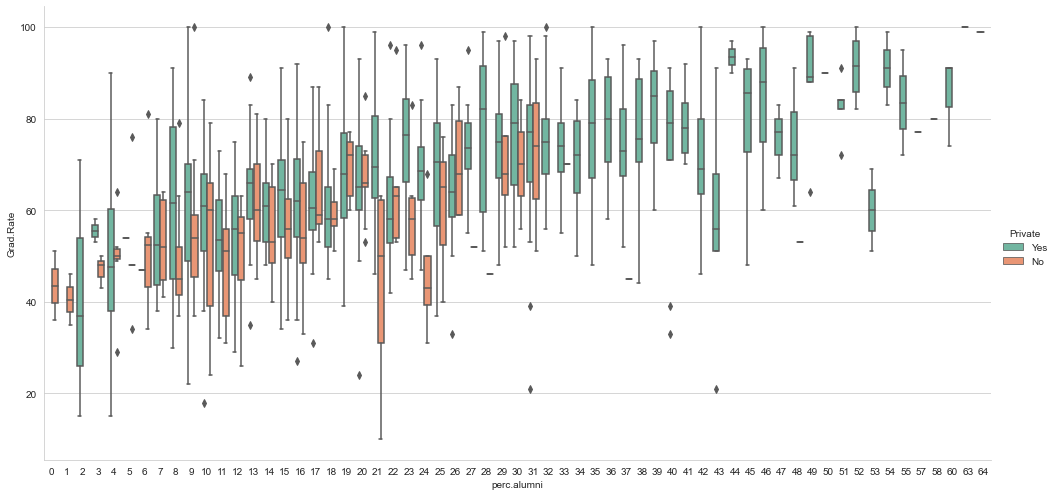

In [631]:
sns.catplot(x='perc.alumni',y='Grad.Rate',data=df,kind='box',height=7,aspect=2,legend=True,hue='Private',palette='Set2')

#### we clearly see the graduation rate favors private universities but also donation from alumni is significantly higher from private universities alumni


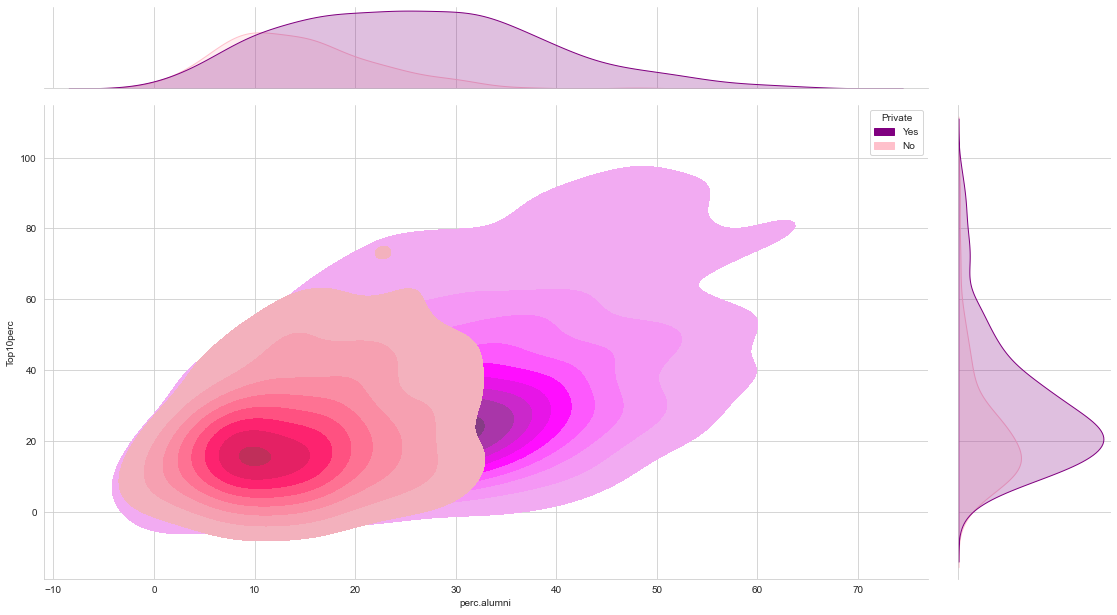

In [632]:
custom = {'Yes':'purple',
          'No':'pink'}

g = sns.jointplot(x='perc.alumni',y='Top10perc',data=df,hue='Private',kind='kde',fill=True,palette=custom)

g.fig.set_size_inches(17,9)

#### here again we see the density for top10 students enrolled in Private is more

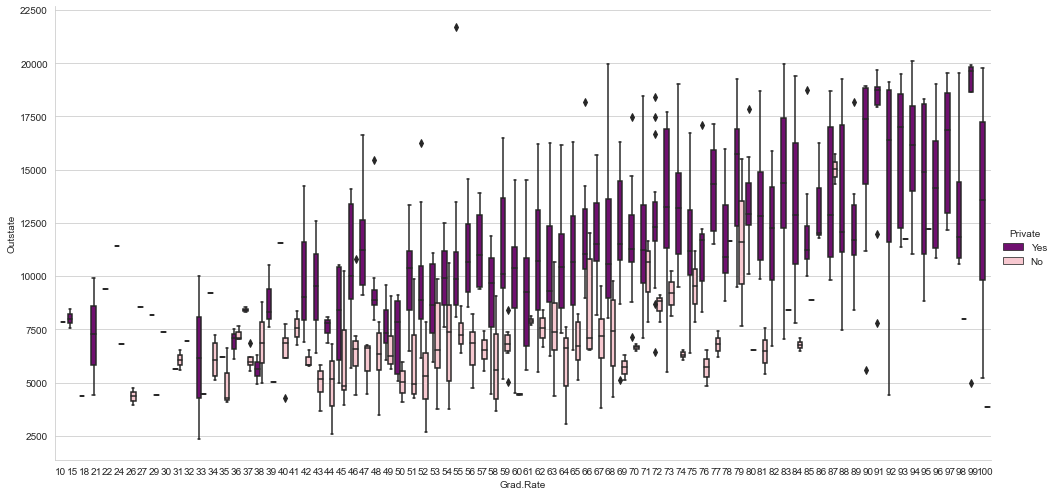

In [633]:
sns.catplot(x='Grad.Rate',y='Outstate',data=df,kind='box',height=7,aspect=2,legend=True,hue='Private',palette=custom)

#### clearly we see that grad rate and outstate is overall higher in private universities

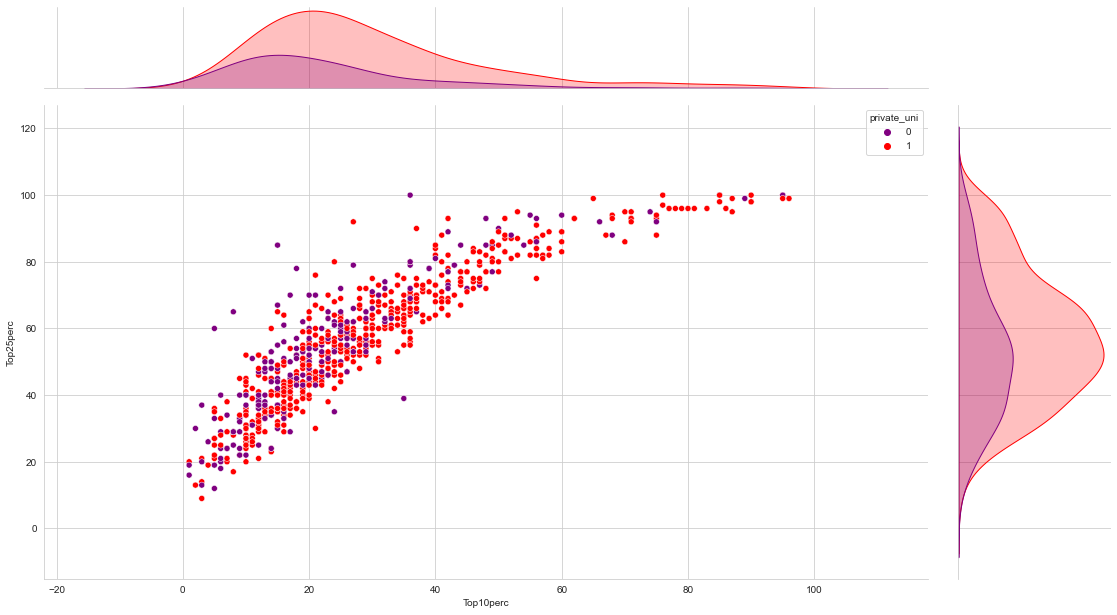

In [634]:
custom = {0:'purple',
         1:'red'}

g = sns.jointplot(x=df.Top10perc,y=df.Top25perc,data=df,hue='private_uni',palette=custom)

g.fig.set_size_inches(17,9)

#### definately we see more ratio to both variables in terms of private univeristies

In [635]:
heat = df.groupby(['Top10perc','Grad.Rate'])['private_uni'].sum().unstack().fillna(0)

heat

Grad.Rate,10,15,18,21,22,24,26,27,29,30,...,91,92,93,94,95,96,97,98,99,100
Top10perc,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


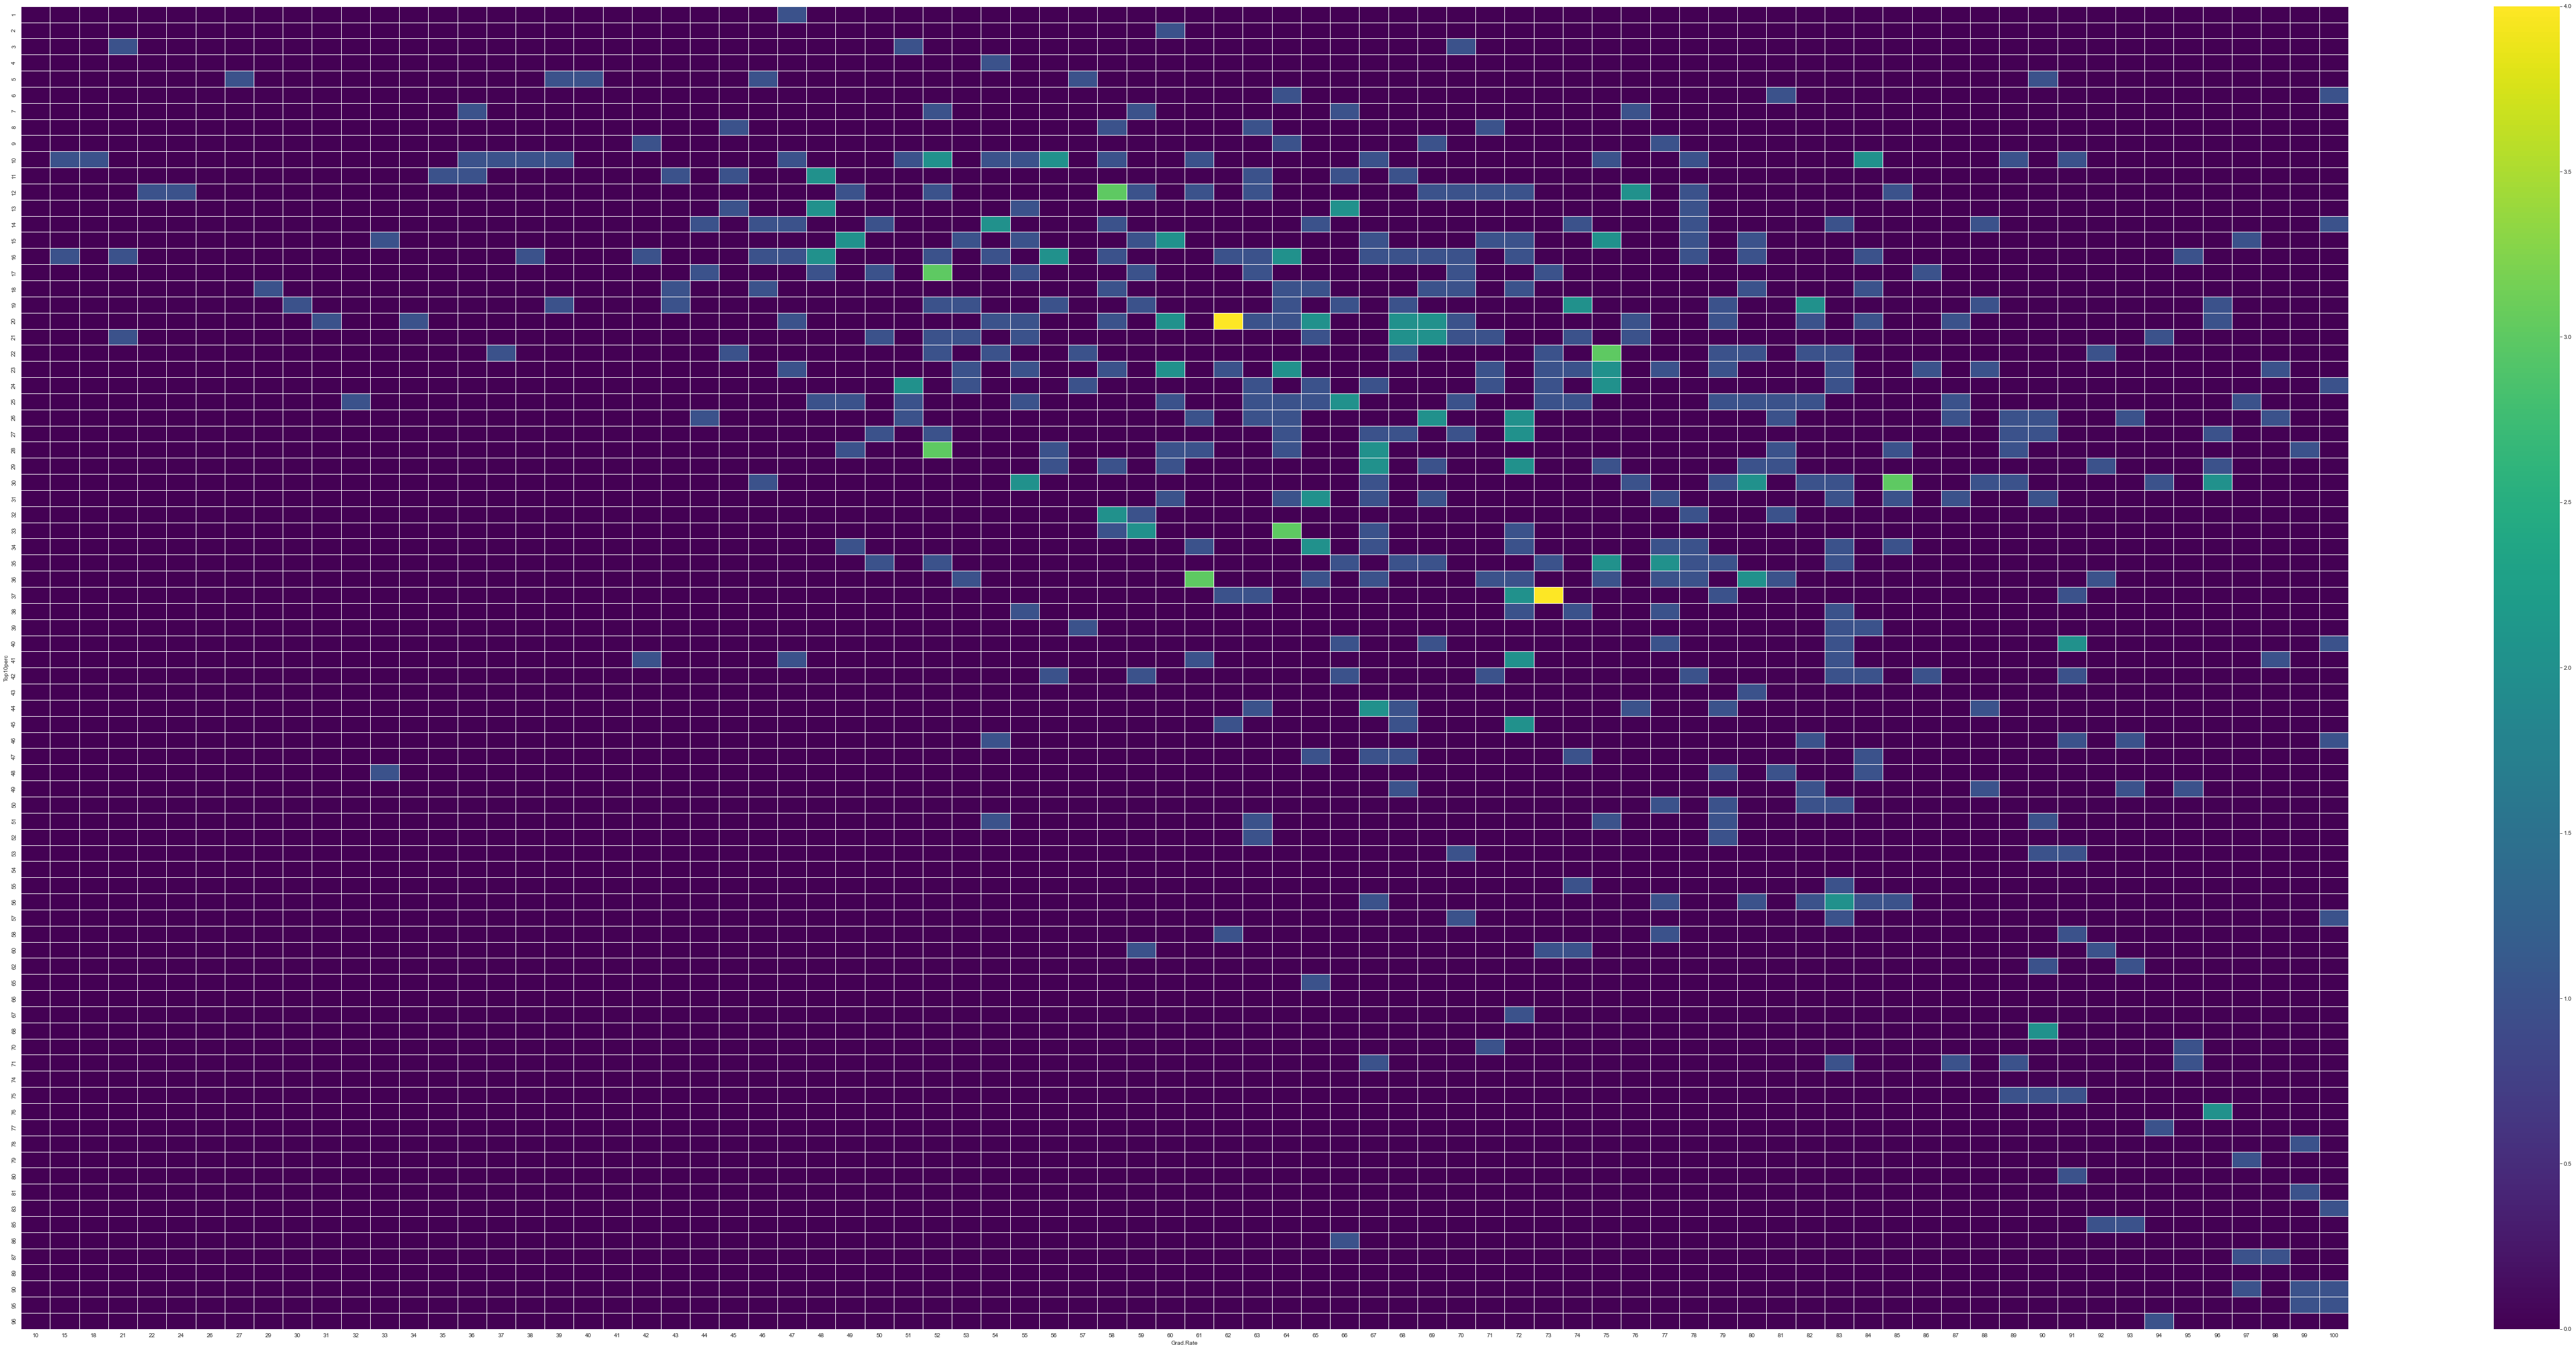

In [636]:
fig, ax = plt.subplots(figsize=(90,42))

sns.heatmap(heat,ax=ax,linewidths=0.5,cmap='viridis')

#### a heatmap for private universities with regards to top10 students enrolled and grduation rate

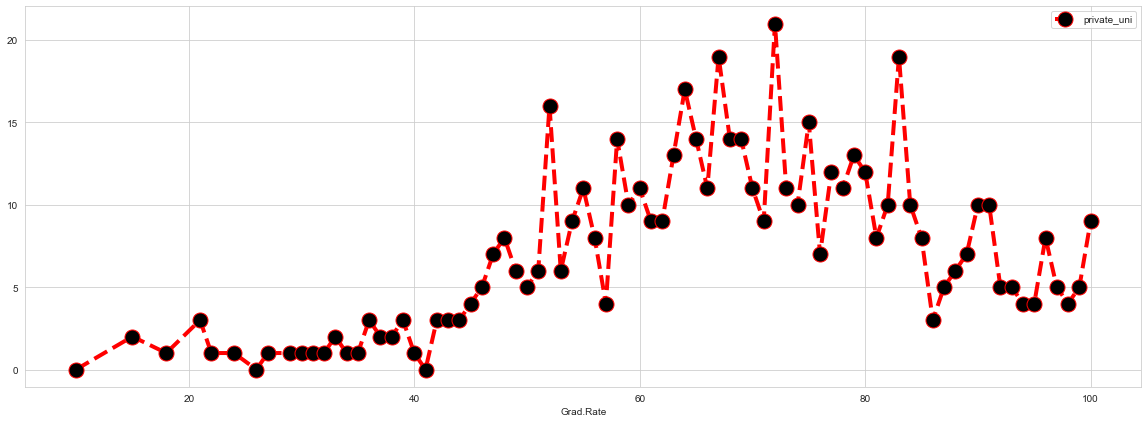

In [637]:
df.groupby(['Grad.Rate'])['private_uni'].sum().fillna(0).plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='black',markersize=15,linestyle='dashed',linewidth=4,color='red')

#### seems like the highest number of private uni we see is above 20 and grad rate between 70-80

In [638]:
######################################################################
############## Part V - PCA
######################################################################


In [639]:
df.reset_index(inplace=True)


In [640]:
df.head()

,index,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,private_uni
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [641]:
df.drop(columns='index',inplace=True)

In [642]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,private_uni
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [643]:
X = df.drop(columns=['Private','private_uni'])

X.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [644]:
y = df['private_uni']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: private_uni, dtype: int32

In [645]:
from sklearn.preprocessing import StandardScaler


In [646]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [647]:
from sklearn.decomposition import PCA

In [648]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])
final_df = pd.concat([principal_df, y], axis=1)

final_df.head()

,principal_component_1,principal_component_2,private_uni
0,-1.597536,0.759415,1
1,-2.204493,-0.584801,1
2,-1.435579,-1.097964,1
3,2.859544,-2.620620,1
4,-2.225076,0.015707,1


In [649]:
final_df.isnull().any()

principal_component_1    False
principal_component_2    False
private_uni              False
dtype: bool

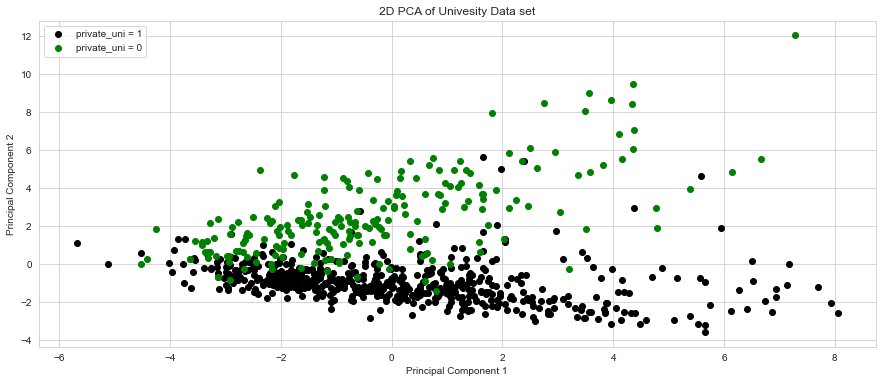

In [650]:
colors = {0: 'green', 1: 'black'}

plt.figure(figsize=(15, 6))

for i in final_df['private_uni'].unique():
    subset = final_df[final_df['private_uni'] == i]
    plt.scatter(subset['principal_component_1'], subset['principal_component_2'], 
                color=colors[i], label=f'private_uni = {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Univesity Data set')
plt.legend()
plt.grid(True)

#### beauty of PCA


In [651]:
features = X.columns

features

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [652]:
df_comp = pd.DataFrame(pca.components_,columns=[features])

df_comp

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.247632,0.206599,0.174835,0.353916,0.343590,0.153057,0.025201,0.29505,0.249386,0.064543,-0.043842,0.318837,0.316932,-0.177258,0.205524,0.318651,0.255769
1,0.332694,0.373220,0.404362,-0.081359,-0.043759,0.418198,0.315082,-0.24847,-0.136592,0.056750,0.219596,0.059028,0.047199,0.245870,-0.245827,-0.130439,-0.168421


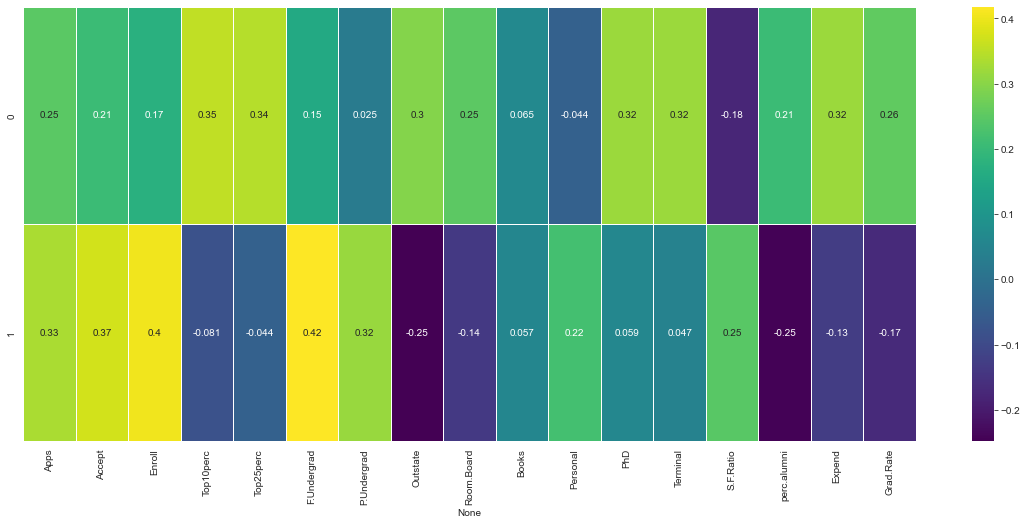

In [653]:
fig, ax = plt.subplots(figsize=(20,8))                     

sns.heatmap(df_comp,ax=ax,linewidths=0.5,annot=True,cmap='viridis')

#### PCA corr heatmap

In [654]:
#######################################################################
######################## Part VI - Model - Classification
#######################################################################


In [655]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,private_uni
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [656]:
df.drop(columns='Private',inplace=True)                   #### we need to drop categorical cols for vif

In [657]:
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,private_uni
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [658]:
from statsmodels.tools.tools import add_constant

df_with_constant = add_constant(df)

df_with_constant.head()                    #### setting up Vif


,const,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,private_uni
0,1.0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,1.0,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1.0,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,1.0,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,1.0,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [659]:
vif = pd.DataFrame() 

In [660]:
vif["Feature"] = df_with_constant.columns


In [661]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]


In [662]:
vif                #### this is bad news, but we wouldnt be dropping anything but instead take care of it using pipeline

,Feature,VIF
0,const,119.514775
1,Apps,14.170796
2,Accept,21.518175
3,Enroll,22.001913
4,Top10perc,7.650139
5,Top25perc,5.699180
6,F.Undergrad,18.091030
7,P.Undergrad,1.718383
8,Outstate,4.327265
9,Room.Board,2.033065


In [663]:
from sklearn.model_selection import train_test_split


In [664]:
X = df.drop(columns=['private_uni'])

X.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [665]:
y = df['private_uni']

y.value_counts()                      #### not the best data, small data and to top it off its imbalanced target

1    564
0    212
Name: private_uni, dtype: int64

In [666]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline


In [667]:
X.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [668]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components='mle'))  
        ]),['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'])
    ])


In [669]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [670]:
from sklearn.linear_model import LogisticRegression


In [671]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


In [672]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components='mle'))]),
                                                  ['Apps', 'Accept', 'Enroll',
                                                   'Top10perc', 'Top25perc',
                                                   'F.Undergrad', 'P.Undergrad',
                                                   'Outstate', 'Room.Board',
                                                   'Books', 'Personal', 'PhD',
                                                   'Terminal', 'S.F.Ratio',
                                                   'perc.alumni', 'Expend',
                                 

In [673]:
y_predict = model.predict(X_test)

In [674]:
from sklearn import metrics


In [675]:
print(metrics.classification_report(y_test,y_predict))                #### quite decent model for the first try


              precision    recall  f1-score   support

           0       0.89      0.82      0.85        66
           1       0.93      0.96      0.94       167

    accuracy                           0.92       233
   macro avg       0.91      0.89      0.90       233
weighted avg       0.92      0.92      0.92       233



In [676]:
from sklearn.ensemble import RandomForestClassifier                #### bringing random forest


In [677]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])


In [678]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components='mle'))]),
                                                  ['Apps', 'Accept', 'Enroll',
                                                   'Top10perc', 'Top25perc',
                                                   'F.Undergrad', 'P.Undergrad',
                                                   'Outstate', 'Room.Board',
                                                   'Books', 'Personal', 'PhD',
                                                   'Terminal', 'S.F.Ratio',
                                                   'perc.alumni', 'Expend',
                                 

In [679]:
y_predict = model.predict(X_test)

In [680]:
print(metrics.classification_report(y_test,y_predict))                #### made it worst


              precision    recall  f1-score   support

           0       0.86      0.77      0.82        66
           1       0.91      0.95      0.93       167

    accuracy                           0.90       233
   macro avg       0.89      0.86      0.87       233
weighted avg       0.90      0.90      0.90       233



In [681]:
from sklearn.linear_model import RidgeClassifier                     #### lets see what ridge can bring to the table

In [682]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'])
    ])


In [683]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RidgeClassifier(alpha=1.0))
])


In [684]:
model.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Apps', 'Accept', 'Enroll',
                                                   'Top10perc', 'Top25perc',
                                                   'F.Undergrad', 'P.Undergrad',
                                                   'Outstate', 'Room.Board',
                                                   'Books', 'Personal', 'PhD',
                                                   'Terminal', 'S.F.Ratio',
                                                   'perc.alumni', 'Expend',
                                                   'Grad.Rate'])])),
                ('classifier', RidgeClassifier())])

In [685]:
y_predict = model.predict(X_test)

In [686]:
print(metrics.classification_report(y_test,y_predict))                #### quite decent


              precision    recall  f1-score   support

           0       0.86      0.74      0.80        66
           1       0.90      0.95      0.93       167

    accuracy                           0.89       233
   macro avg       0.88      0.85      0.86       233
weighted avg       0.89      0.89      0.89       233



In [687]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components='mle'))  
        ]),['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'])
    ])


In [688]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [689]:
import xgboost as xgb

In [690]:
clf_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',n_jobs=-1))
])

param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.7, 0.8, 0.9],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9]
}

In [691]:
from sklearn.model_selection import RandomizedSearchCV

In [692]:
%%time

random_search_xgb = RandomizedSearchCV(clf_xgb, param_grid_xgb, cv=3, scoring='accuracy', random_state=42,verbose=2)
random_search_xgb.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=300, classifier__subsample=0.7; total time=   0.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=300, classifier__subsample=0.7; total time=   0.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=300, classifier__subsample=0.7; total time=   0.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.7; total time=   0.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.7; total time=   0.4s
[CV] END classifier__colsample_bytree=0.7, classifier__lear

In [693]:
best_model = random_search_xgb.best_estimator_

In [694]:
y_predict = best_model.predict(X_test)

In [695]:
print(metrics.classification_report(y_test,y_predict))                           #### best one yet

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        66
           1       0.92      0.96      0.94       167

    accuracy                           0.91       233
   macro avg       0.91      0.88      0.89       233
weighted avg       0.91      0.91      0.91       233



In [696]:
from imblearn.over_sampling import SMOTE


In [697]:
from imblearn.pipeline import Pipeline as ImbPipeline


In [698]:
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1))
])


In [699]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components='mle'))]),
                                                  ['Apps', 'Accept', 'Enroll',
                                                   'Top10perc', 'Top25perc',
                                                   'F.Undergrad', 'P.Undergrad',
                                                   'Outstate', 'Room.Board',
                                                   'Books', 'Personal', 'PhD',
                                                   'Terminal', 'S.F.Ratio',
                                                   'perc.alumni', 'Expend',
                                 

In [700]:
y_predict = model.predict(X_test)


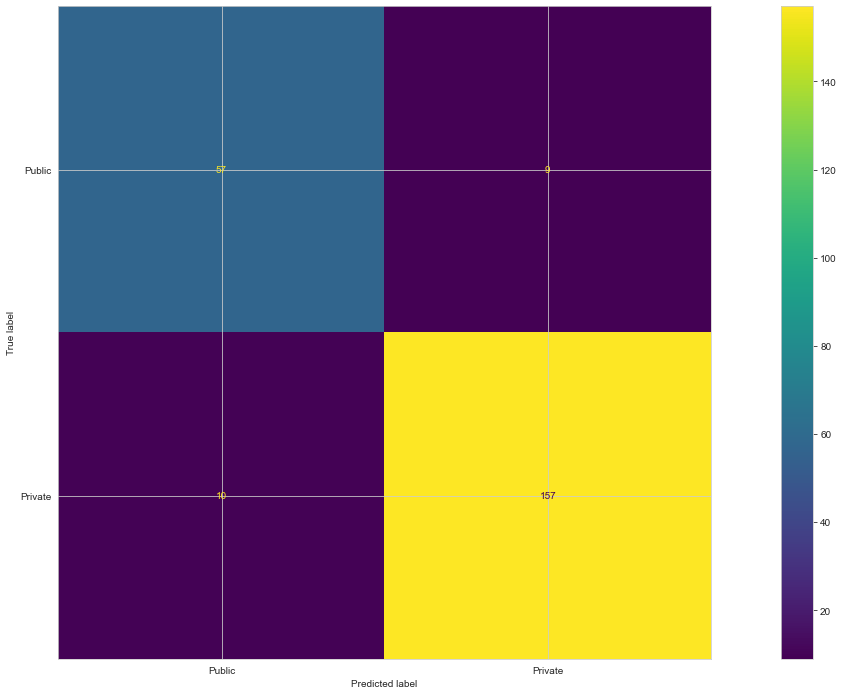

In [701]:
cm = metrics.confusion_matrix(y_test,y_predict)

labels = ['Public','Private']

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

fig, ax = plt.subplots(figsize=(25,12))

disp.plot(ax=ax)


In [702]:
from lightgbm import LGBMClassifier


In [703]:
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', LGBMClassifier(class_weight='balanced', random_state=42,n_jobs=-1))
])


In [704]:
%%time

model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 397, number of negative: 397
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 794, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Wall time: 198 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components='mle'))]),
                                                  ['Apps', 'Accept', 'Enroll',
                                                   'Top10perc', 'Top25perc',
                                                   'F.Undergrad', 'P.Undergrad',
                                                   'Outstate', 'Room.Board',
                                                   'Books', 'Personal', 'PhD',
                                                   'Terminal', 'S.F.Ratio',
                                                   'perc.alumni', 'Expend',
                                 

In [705]:
y_predict = model.predict(X_test)


In [706]:
print(metrics.classification_report(y_test,y_predict))                  #### its not improving much anymore 

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        66
           1       0.92      0.94      0.93       167

    accuracy                           0.90       233
   macro avg       0.88      0.87      0.88       233
weighted avg       0.90      0.90      0.90       233



In [707]:
#### now lets suppose we were presented this data set without target columns and we need to figure out a way to cluster them into groups of 2 as private and public
#### therefore we will be using KMeans

In [708]:
from sklearn.cluster import KMeans

In [709]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KMeans(n_clusters=2,random_state=42))
])


In [710]:
model.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components='mle'))]),
                                                  ['Apps', 'Accept', 'Enroll',
                                                   'Top10perc', 'Top25perc',
                                                   'F.Undergrad', 'P.Undergrad',
                                                   'Outstate', 'Room.Board',
                                                   'Books', 'Personal', 'PhD',
                                                   'Terminal', 'S.F.Ratio',
                                                   'perc.alumni', 'Expend',
                                 

In [711]:
y_predict = model.predict(X_test)

In [712]:
print(metrics.classification_report(y_test,y_predict))                 #### we have to remember that KMeans is an unsupervised classifier so its only used when the target column is not known or defined
                                                                       #### using here doesn't make sense also its not used to compare to target columns like we did here

              precision    recall  f1-score   support

           0       0.25      0.33      0.29        66
           1       0.70      0.61      0.65       167

    accuracy                           0.53       233
   macro avg       0.48      0.47      0.47       233
weighted avg       0.57      0.53      0.55       233



In [713]:
#######################################################################
######################## Part VI - Model - Regression
#######################################################################


In [714]:
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,private_uni
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [715]:
X = df.drop(columns='Grad.Rate')

X.head()                        #### we will be predicting the graduation rate here

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,private_uni
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,1


In [716]:
y = df['Grad.Rate']

y.head()

0    60
1    56
2    54
3    59
4    15
Name: Grad.Rate, dtype: int64

In [717]:
from sklearn.linear_model import LinearRegression


In [718]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components='mle'))  
        ]),['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'private_uni'])
    ])


In [719]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [720]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression(n_jobs=-1))
                       ])


In [721]:
%%time

model.fit(X_train, y_train)

Wall time: 24.8 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components='mle'))]),
                                                  ['Apps', 'Accept', 'Enroll',
                                                   'Top10perc', 'Top25perc',
                                                   'F.Undergrad', 'P.Undergrad',
                                                   'Outstate', 'Room.Board',
                                                   'Books', 'Personal', 'PhD',
                                                   'Terminal', 'S.F.Ratio',
                                                   'perc.alumni', 'Expend',
                                 

In [722]:
y_predict = model.predict(X_test)

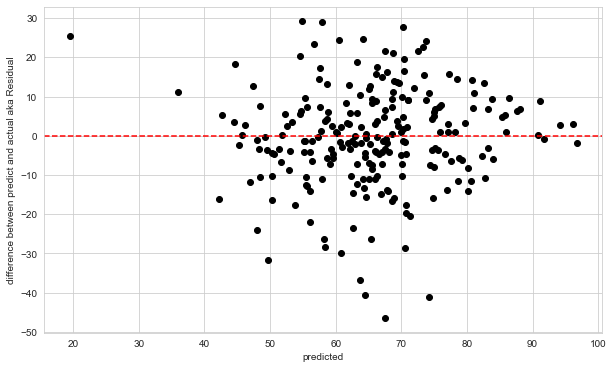

In [723]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals,color='black')

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')

#### looks good


In [724]:
metrics.r2_score(y_test,y_predict)

0.4690660000822836

In [725]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))              #### we are off by 12 in graduation rate which honestly is OK


12.720540225392469

In [726]:
from sklearn.ensemble import RandomForestRegressor


In [727]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42,max_features='auto',n_estimators=100,n_jobs=-1))
])


In [728]:
param_grid = {
    'regressor__n_estimators': [50,100],
    'regressor__max_depth': [None, 10],
    'regressor__min_samples_split': [2],
    'regressor__min_samples_leaf': [1]
}


In [729]:
from sklearn.model_selection import GridSearchCV


In [730]:
grid_model = GridSearchCV(model, param_grid, cv=3, scoring='r2', verbose=2)


In [731]:
%%time

grid_model.fit(X_train, y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=50; total time=   0.1s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=50; total time=   0.2s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=50; total time=   0.1s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.3s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.3s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.3s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components='mle'))]),
                                                                         ['Apps',
                                                                          'Accept',
                                                                          'Enroll',
                                                                          'Top10perc',
                                                                          'Top25perc

In [732]:
best_model = grid_model.best_estimator_

In [733]:
y_predict = best_model.predict(X_test)

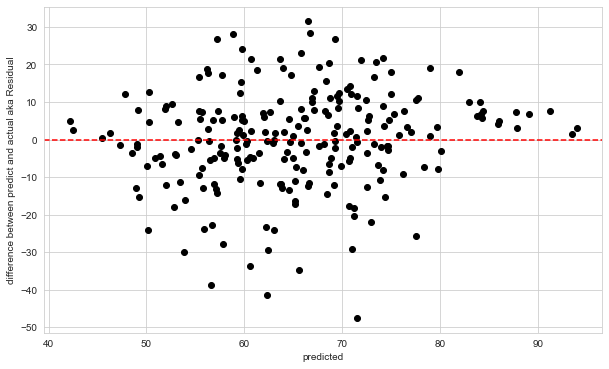

In [734]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals,color='black')

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')


In [735]:
metrics.r2_score(y_test,y_predict)

0.4443601159018121

In [736]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))              #### we are off by 13 so not better then before


13.013136727603559

In [737]:
from sklearn.model_selection import RandomizedSearchCV


In [738]:
param_grid = {
    'regressor__n_estimators': [100, 200, 500],
    'regressor__max_features': ['auto', 'sqrt'],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2],
    'regressor__bootstrap': [True, False]
}


In [739]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42,max_features='auto',n_estimators=100,n_jobs=-1))
])


In [740]:
random_search = RandomizedSearchCV(model, param_grid, cv=3, random_state=42, verbose=2)


In [741]:
%%time

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END regressor__bootstrap=False, regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=5, regressor__n_estimators=100; total time=   0.2s
[CV] END regressor__bootstrap=False, regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=5, regressor__n_estimators=100; total time=   0.2s
[CV] END regressor__bootstrap=False, regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=5, regressor__n_estimators=100; total time=   0.2s
[CV] END regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=2, regressor__n_estimators=200; total time=   0.4s
[CV] END regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regres

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler()),
                                                                                               ('pca',
                                                                                                PCA(n_components='mle'))]),
                                                                               ['Apps',
                                                                                'Accept',
                                                                                'Enroll',
                                                                                'Top10perc',
                  

In [742]:
best_model = random_search.best_estimator_

In [743]:
y_predict = best_model.predict(X_test)

Text(0, 0.5, 'difference between predict and actual aka Residual')

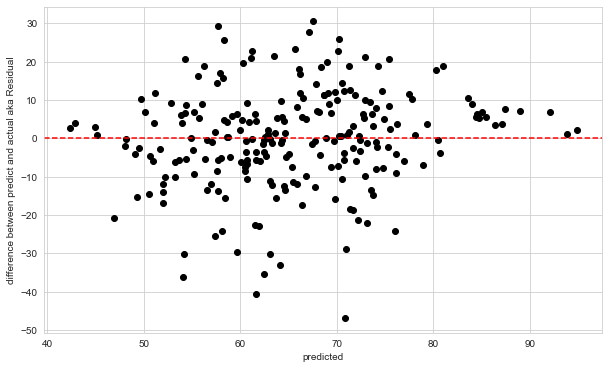

In [744]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals,color='black')

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')


In [745]:
metrics.r2_score(y_test,y_predict)

0.4492204709684201

In [746]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))              #### no improvement


12.956096737667762

In [747]:
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,private_uni
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [748]:
X = df.drop(columns=['Grad.Rate','private_uni'])

X.head()                        #### we are preventing data leakage by not showing private_uni in this case

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922


In [749]:
y = df['Grad.Rate']

y.head()                      

0    60
1    56
2    54
3    59
4    15
Name: Grad.Rate, dtype: int64

In [750]:
from sklearn.linear_model import LinearRegression


In [751]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components='mle'))  
        ]),['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend'])
    ])


In [752]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [753]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression(n_jobs=-1))
                       ])


In [754]:
%%time

model.fit(X_train, y_train)

Wall time: 17.1 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components='mle'))]),
                                                  ['Apps', 'Accept', 'Enroll',
                                                   'Top10perc', 'Top25perc',
                                                   'F.Undergrad', 'P.Undergrad',
                                                   'Outstate', 'Room.Board',
                                                   'Books', 'Personal', 'PhD',
                                                   'Terminal', 'S.F.Ratio',
                                                   'perc.alumni',
                                           

In [755]:
y_predict = model.predict(X_test)

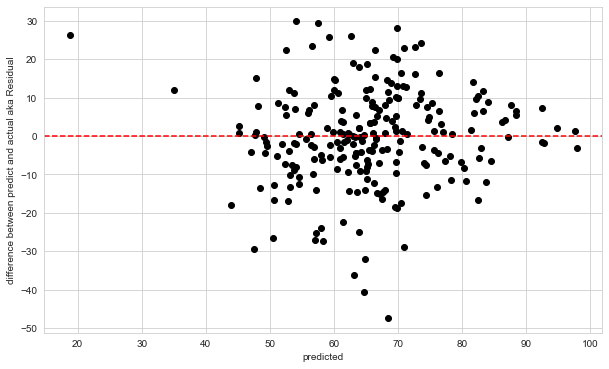

In [756]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals,color='black')

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')


In [757]:
metrics.r2_score(y_test,y_predict)

0.4775780250128743

In [758]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))              #### this is the best one yet


12.61815927906567

In [ ]:
############################################################################################################################
#### We successfully concluded our university dataset project, achieving strong classification results with the ############
#### GradientBoostingClassifier, which delivered 91% accuracy and precision. Despite the small and imbalanced dataset,######
#### our approach with SMOTE also performed well. In regression, we obtained an RMSE of 12 using logistic regression,#######
#### carefully excluding the private_uni variable to prevent data leakage. Overall, the project yielded valuable insights,##
#### with solid outcomes in both classification and regression tasks. ######################################################
############################################################################################################################
